### Import Modul

In [210]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report

### Import Data

#### Data Training

**Load Data Training Hasil Encode** (Belum dinormalisasi)

In [211]:
train = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Training.xlsx', sheet_name='Hasil Encode', index_col=0)
x_train = train.iloc[:, 2:].values
y_train = train.iloc[:, 1].values
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


**Load Data Training Hasil Normalisasi**

In [212]:
train_normalize = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Training.xlsx', sheet_name='Normalisasi', index_col=0)
x_train_normalize = train_normalize.iloc[:, 1:-1].values
y_train_normalize = train_normalize.iloc[:, -1].values
train_normalize.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1.0,1,0.271174,0.2,0.0,0.014151,1.0,0
1,2,0.0,0,0.472229,0.2,0.0,0.139136,0.0,1
2,3,1.0,0,0.321438,0.0,0.0,0.015469,1.0,1
3,4,0.0,0,0.434531,0.2,0.0,0.103644,1.0,1
4,5,1.0,1,0.434531,0.0,0.0,0.015713,1.0,0


#### Data Testing

**Load Data Testing Hasil Encode** (Belum dinormalisasi)

In [213]:
test = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Testing.xlsx', sheet_name='Hasil Encode', index_col=0)

label = pd.read_csv("D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/data/test_data_GroundTruth_cl.csv")

x_test = test.iloc[:, 1:].values
y_test = label['Survived'].values

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


**Load Data Training Hasil Normalisasi**

In [214]:
test_normalize = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Testing.xlsx', sheet_name='Normalisasi', index_col=0)
x_test_normalize = test_normalize.iloc[:, 1:-1].values
y_test_normalize = test_normalize.iloc[:, -1].values
test_normalize.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,1,0.452723,0.000,0.000000,0.015282,0.5,0
1,893,1.0,0,0.617566,0.125,0.000000,0.013663,1.0,1
2,894,0.5,1,0.815377,0.000,0.000000,0.018909,0.5,0
3,895,1.0,1,0.353818,0.000,0.000000,0.016908,1.0,0
4,896,1.0,0,0.287881,0.125,0.166667,0.023984,1.0,1


### Visualisasi Plot Confussion Matrix

In [215]:
def plot_cm(matrix, title): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    ax.xaxis.set_ticklabels(['Not Survived', 'Survived']);ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])
    plt.show()

### Pembuatan Model Single Layer Perceptron

In [216]:
lr = 0.01
epochs = 1000

#### **Model 1**

In [258]:
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class Perceptron:

    def __init__(self, learning_rate, n_iters):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None
        self.weights_sum = []


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        np.random.seed(42)

        # random method
        # small range 1
        rand_weights = np.random.uniform(-0.3,0.3, size=n_features+1)

        # small range 2
        # rand_weights = np.random.uniform(0,1, size=n_features)

        # small range 3
        # rand_weights = np.random.uniform(-1,1, size=n_features)

        # xavhiar method
        # lower, upper = -(1.0 / np.sqrt(x_train.shape[1])), (1.0 / np.sqrt(x_train.shape[1]))
        # rand_weights = np.random.uniform(lower,upper, size=n_features)
        
        self.weights = np.array([0.03581891, 0.01626286, -0.01412892, 0.04499895,-0.04219389,0.01523323, 0.04704999])

        # self.weights = rand_weights[:-1]
        self.bias = rand_weights[-1]

        y_ = np.where(y > 0 , 1, 0)

        first_w = self.weights.copy()
        first_b = self.bias.copy()

        self.weights_sum.append([first_w, first_b])

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                
        self.weights_sum.append([self.weights, self.bias])


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def get_weights(self):
        return self.weights_sum    
    

##### Uji coba data ternormalisasi

In [259]:
p1 = Perceptron(learning_rate=lr, n_iters=epochs)
p1.fit(x_train_normalize, y_train_normalize)
predictions = p1.predict(x_test_normalize)

In [260]:
weights = p1.get_weights()
weights

[[array([ 0.03581891,  0.01626286, -0.01412892,  0.04499895, -0.04219389,
          0.01523323,  0.04704999]),
  0.21970568746496105],
 [array([-0.02418109, -0.02373714, -0.03317516, -0.00500105,  0.00613944,
          0.01731617, -0.00795001]),
  0.039705687464961]]

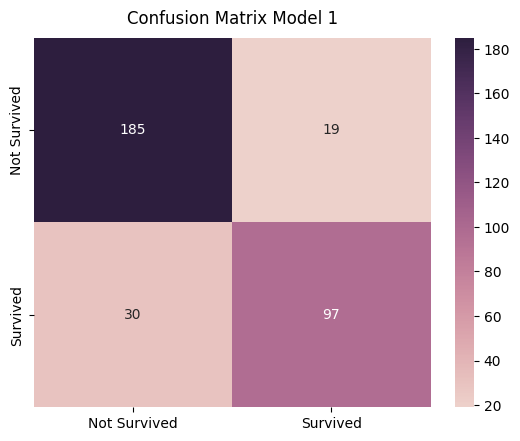

In [261]:
model1_cf = confusion_matrix(y_test, predictions)
plot_cm(model1_cf, 'Model 1')

In [262]:
model1_report = classification_report(y_test_normalize, predictions, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model1_report).transpose()

,precision,recall,f1-score,support
Not Survived,0.860465,0.906863,0.883055,204.000000
Survived,0.836207,0.763780,0.798354,127.000000
accuracy,0.851964,0.851964,0.851964,0.851964
macro avg,0.848336,0.835321,0.840704,331.000000
weighted avg,0.851158,0.851964,0.850556,331.000000


#### **Model 2**

In [263]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
keras.utils.set_random_seed(42)
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[len(x_train[0])], activation='sigmoid', kernel_initializer='random_uniform')])
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [223]:
weights = model.get_weights()
weights

[array([[ 0.03581891],
        [ 0.01626286],
        [-0.01412892],
        [ 0.04499895],
        [-0.04219389],
        [ 0.01523323],
        [ 0.04704999]], dtype=float32),
 array([0.], dtype=float32)]

In [224]:
model.fit(x_train_normalize, y_train_normalize, epochs=epochs)

predict = model.predict(x_test_normalize)
predict = np.round(predict)
predict = predict.astype(int)
predict = predict.reshape(1, -1)[0]

Epoch 1/1000


23/23 [==============================] - 0s 921us/step - loss: 0.2544 - accuracy: 0.3778
Epoch 2/1000
23/23 [==============================] - 0s 813us/step - loss: 0.2496 - accuracy: 0.5225
Epoch 3/1000
23/23 [==============================] - 0s 886us/step - loss: 0.2457 - accuracy: 0.5941
Epoch 4/1000
23/23 [==============================] - 0s 826us/step - loss: 0.2423 - accuracy: 0.5955
Epoch 5/1000
23/23 [==============================] - 0s 891us/step - loss: 0.2390 - accuracy: 0.5955
Epoch 6/1000
23/23 [==============================] - 0s 818us/step - loss: 0.2363 - accuracy: 0.5955
Epoch 7/1000
23/23 [==============================] - 0s 847us/step - loss: 0.2339 - accuracy: 0.5955
Epoch 8/1000
23/23 [==============================] - 0s 829us/step - loss: 0.2319 - accuracy: 0.5955
Epoch 9/1000
23/23 [==============================] - 0s 812us/step - loss: 0.2299 - accuracy: 0.5955
Epoch 10/1000
23/23 [==============================] - 0s 854us/step - loss: 0.2283 - accuracy:

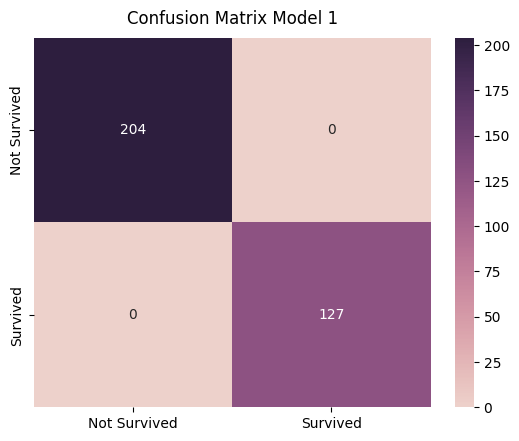

In [225]:
model2_cf1 = confusion_matrix(y_test_normalize, predict)
plot_cm(model2_cf1, 'Model 1')

In [226]:
model2_report1 = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model2_report1).transpose()

,precision,recall,f1-score,support
Not Survived,1.0,1.0,1.0,204.0
Survived,1.0,1.0,1.0,127.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,331.0
weighted avg,1.0,1.0,1.0,331.0


In [230]:
rand_weights = np.random.uniform(-0.05,0.05, size=7+1)
rand_weights[:-1]

array([-0.01957578,  0.00247564, -0.0068055 , -0.02087709,  0.01118529,
       -0.03605061, -0.02078554])